1. Problem Statement : The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

2. Hypothesis Generation
Features can impact the sales of a store Item_Weight, Item_Visibility, Item_Type, Item_MRP, Outlet_Location and Outlet_Type.

#### Loading packages and data

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import xgboost as xg
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("D:\Machine Learning\Datasets for Machine learning\BigMart\Train.csv")
data_test = pd.read_csv("D:\Machine Learning\Datasets for Machine learning\BigMart\Test.csv")

#### Data Exploration

In [3]:
data_train.shape

(8523, 12)

In [4]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Exploratory Data Analysis

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
### Total missing values
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
### Handling Missing Values
median1 = data_train["Item_Weight"].median()
mode1 = data_train["Outlet_Size"].mode().values[0]

data_train["Item_Weight"] = data_train["Item_Weight"].replace(np.nan, median1)
data_train["Outlet_Size"] = data_train["Outlet_Size"].replace(np.nan, mode1)

In [9]:
data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
###
data_train.drop_duplicates(inplace=True)

In [12]:
data_train['Outlet_Age'] = data_train['Outlet_Establishment_Year'].apply(lambda year : 2022 - year)
data_test['Outlet_Age'] = data_test['Outlet_Establishment_Year'].apply(lambda year : 2022 - year)

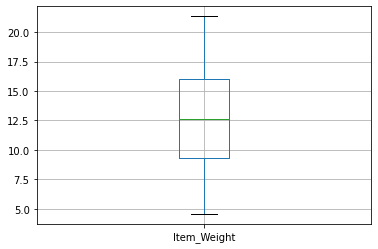

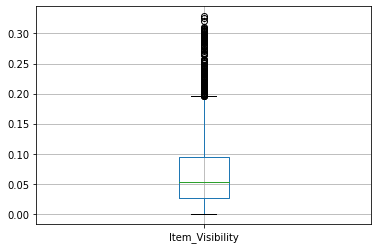

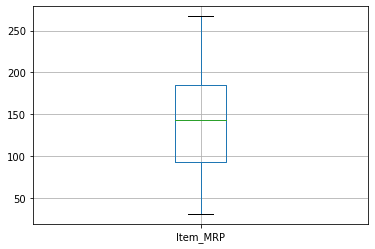

In [13]:
#### Finding Outliers

### No outliers in Item_weight
data_train.boxplot(column=["Item_Weight"])
plt.show()

#@# There are outliers in Item_Visibility
data_train.boxplot(column=["Item_Visibility"])
plt.show()

#### Removing the outliers in Item_Visibility
def remove_outlier(col) :
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    # print(f'{Q1}, {Q3}')
    IQR = Q3-Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range

lower_value, upper_value = remove_outlier(data_train["Item_Visibility"])
data_train["Item_Visibility"] = np.where(data_train["Item_Visibility"]>upper_value, upper_value, data_train["Item_Visibility"])
data_train["Item_Visibility"] = np.where(data_train["Item_Visibility"]<lower_value, lower_value, data_train["Item_Visibility"])
# print(f'{lower_value}, {upper_value}')
# data_train.boxplot(column=["Item_Visibility"])
# plt.show()

### No Outliers in Item_MRP
data_train.boxplot(column=["Item_MRP"])
plt.show()



<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

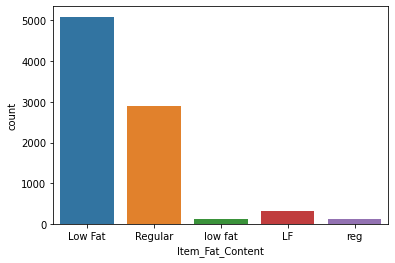

In [14]:

sns.countplot(x='Item_Fat_Content',  data=data_train)


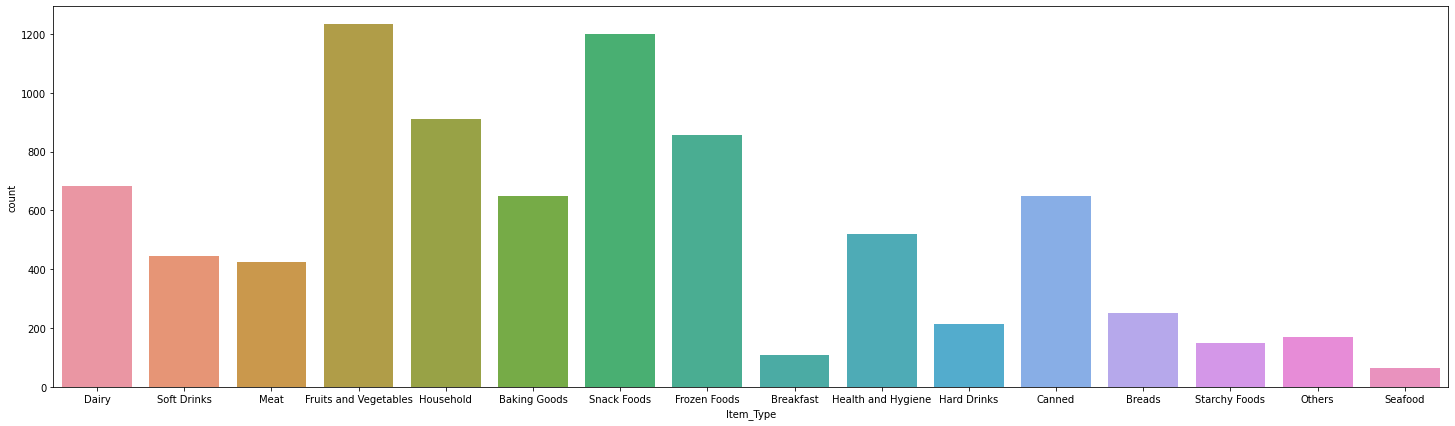

In [15]:
# Item_Type column
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=data_train)
plt.show()

##### Bivariate Analysis

In [16]:
data_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.013744,0.024951,0.007739,0.009693,-0.007739
Item_Visibility,-0.013744,1.000000,-0.001163,-0.064105,-0.117918,0.064105
Item_MRP,0.024951,-0.001163,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,0.007739,-0.064105,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.009693,-0.117918,0.567574,-0.049135,1.000000,0.049135
Outlet_Age,-0.007739,0.064105,-0.005020,-1.000000,0.049135,1.000000


<AxesSubplot:>

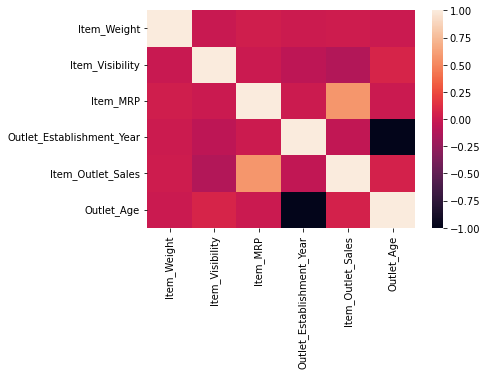

In [17]:
sns.heatmap(data_train.corr())

- Item_MRP and Item_Outlet_Sales has very high correlation.
- Item_Weight and Item_Outlet_Sales have a good correlation.

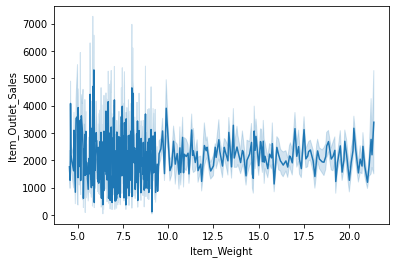

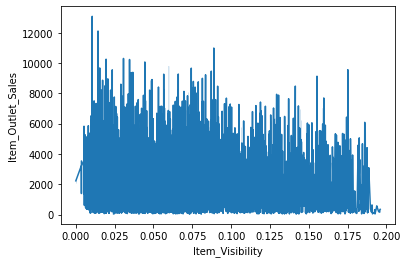

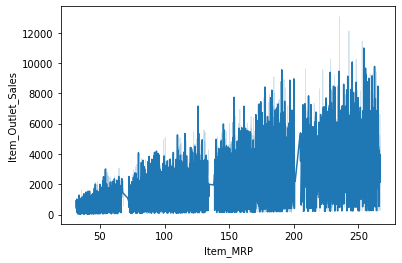

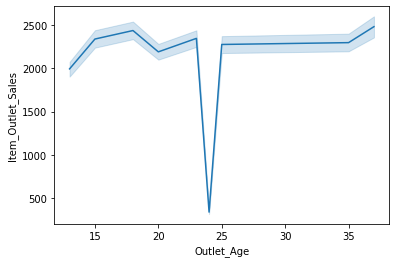

In [18]:
### Numerical vs Numerical

sns.lineplot(x="Item_Weight", y="Item_Outlet_Sales", data= data_train)
plt.show()

sns.lineplot(x="Item_Visibility", y="Item_Outlet_Sales", data= data_train)
plt.show()

sns.lineplot(x="Item_MRP", y="Item_Outlet_Sales", data= data_train)
plt.show()

sns.lineplot(x="Outlet_Age", y="Item_Outlet_Sales", data= data_train)
plt.show()

In [19]:
data_train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [20]:
data_train.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

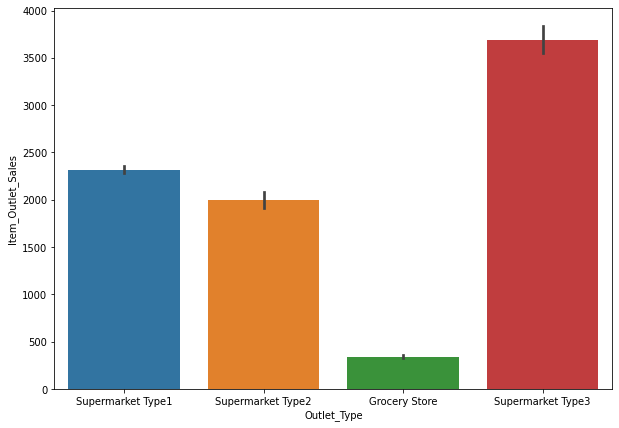

In [21]:
### Categorical vs Numerical

### Sales in types of Outlet
plt.figure(figsize=(10,7))
sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales", data=data_train)
plt.show()

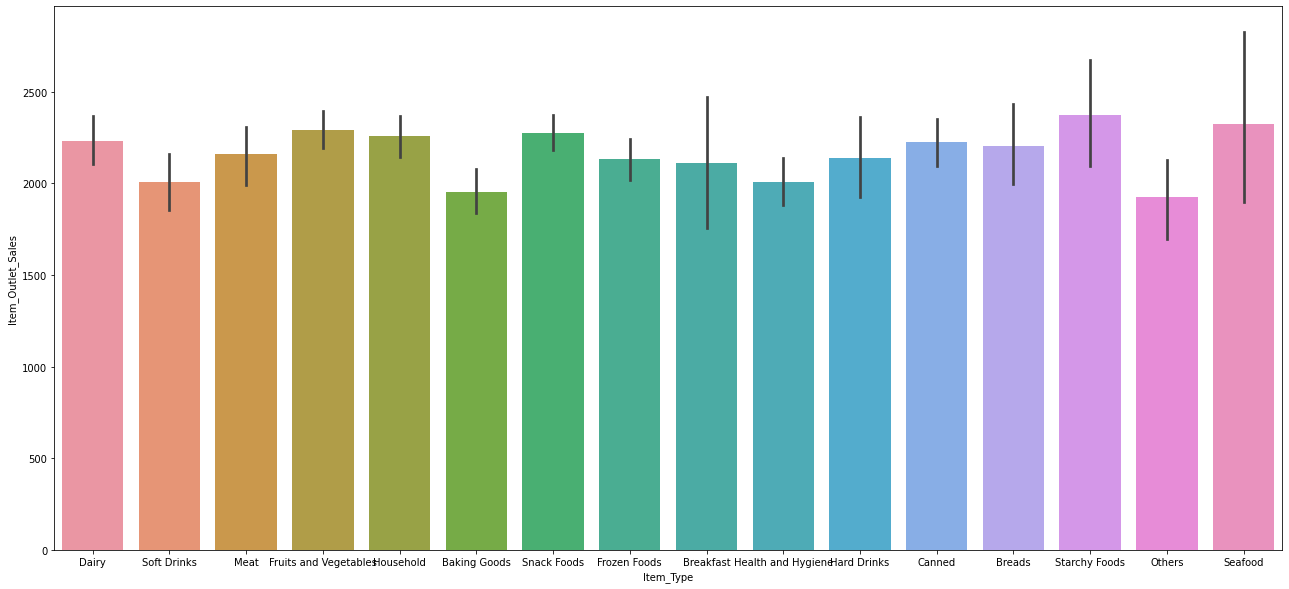

In [22]:
# Sales of particular food category

plt.figure(figsize=(22,10))
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=data_train)
plt.show()

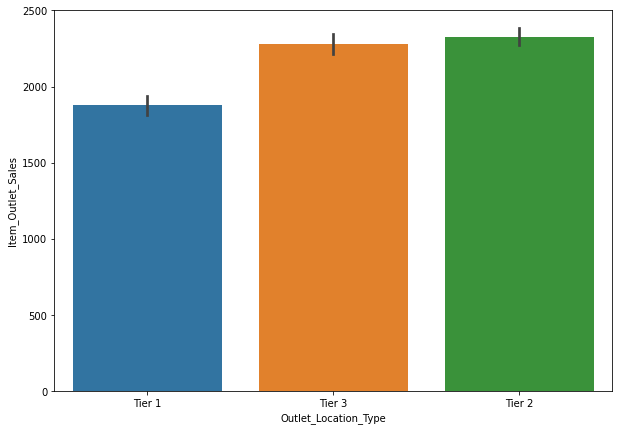

In [23]:
# Sales in cities

plt.figure(figsize=(10,7))
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=data_train)
plt.show()

<Figure size 2160x1080 with 0 Axes>

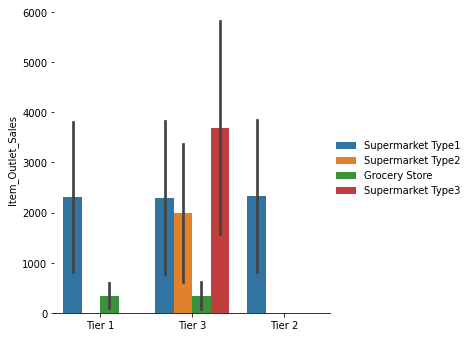

In [24]:
### Categorical vs Categorical
plt.figure(figsize=(30,15))
g = sns.catplot(
    data=data_train, kind="bar",
    x="Outlet_Location_Type", y="Item_Outlet_Sales", hue="Outlet_Type",
    ci="sd"
)

g.despine(left=True)
g.set_axis_labels("", "Item_Outlet_Sales")
g.legend.set_title("")

<Figure size 7200x2160 with 0 Axes>

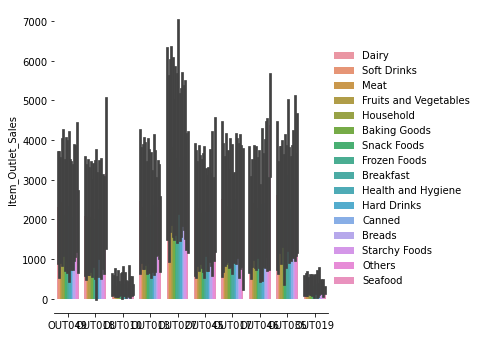

In [25]:
plt.figure(figsize=(100,30))

h = sns.catplot(
    data=data_train, kind="bar",
    x="Outlet_Identifier", y="Item_Outlet_Sales", hue="Item_Type",
    ci="sd"
)

h.despine(left=True)
h.set_axis_labels("", "Item_Outlet_Sales")
h.legend.set_title("")
plt.show()

#### Encoding Categorical Variables

Rectifying the labels in columns

In [26]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
data_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [28]:
data_train.replace({'Item_Fat_Content' : {'low fat' : 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)
data_test.replace({'Item_Fat_Content' : {'low fat' : 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)


In [29]:
data_test['Item_Fat_Content'].value_counts()
data_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [30]:
### Label Encoder
encoder = LabelEncoder()

Label = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']

for i in Label :
    data_train[i] = encoder.fit_transform(data_train[i])
    data_test[i] = encoder.fit_transform(data_test[i])

data_train.head()
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1,23
1,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,2007,3,1,Supermarket Type1,15
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,1998,3,2,Grocery Store,24
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,2007,3,1,Supermarket Type1,15
4,FDY38,NaN,1,0.118599,Dairy,234.2300,OUT027,1985,1,2,Supermarket Type3,37


In [31]:
### One Hot Encoder

cols = ['Item_Type', 'Outlet_Type']

### Applying One hot encoder
OH_enocder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_oh = pd.DataFrame(OH_enocder.fit_transform(data_train[cols])).astype('int64')
test_oh = pd.DataFrame(OH_enocder.fit_transform(data_test[cols])).astype('int64')

### feature names
train_oh.columns = OH_enocder.get_feature_names(cols)
test_oh.columns = OH_enocder.get_feature_names(cols)

### One-hot encoding removed index; put it back
train_oh.index = data_train.index
test_oh.index = data_test.index

### Add one-hot enocded columns to our main dataframe new name: train_fe, test_fe(means feature engineering)
train_fe = pd.concat([data_train, train_oh], axis=1)
test_fe = pd.concat([data_test, test_oh], axis=1)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
### Dropping columns that are not relevant


train_fe = train_fe.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Type', 'Item_Type'], axis=1)
test_fe = test_fe.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Type', 'Item_Type'], axis=1)


In [33]:
# train_fe.head()
# test_fe.head()

train_columns = train_fe.columns
test_columns = test_fe.columns
print(len(train_columns))
print(len(test_columns))

28
27


#### Data Preprocessing

In [34]:
y = train_fe['Item_Outlet_Sales']
X = train_fe.drop('Item_Outlet_Sales', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
X_train.head()
len(X_train)

6818

#### Modelling

In [36]:
def cross_val(model_name, model, X, y, cv) :

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores :
        print(round(i, 2))
    print(f'Average {model_name} score : {round(scores.mean(), 4)}')

Linear Regression

In [37]:
lr_model = LinearRegression(normalize=True)

lr_model.fit(X_train, y_train)

y_predict = lr_model.predict(X_test)

### Scores

lr_MAE = round(MAE(y_test, y_predict),2)
lr_MSE = round(MSE(y_test, y_predict),2)
lr_R_2 = round(R2(y_test, y_predict),4)
lr_CS  = round(CVS(lr_model, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {lr_MAE}\n")
print(f" Mean Squared Error: {lr_MSE}\n")
print(f" R^2 Score: {lr_R_2}\n")
cross_val(lr_model,LinearRegression(),X,y,5)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior

 Mean Absolute Error: 852.26

 Mean Squared Error: 1282399.56

 R^2 Score: 0.5619

LinearRegression(normalize=True) Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression(normalize=True) score : 0.558


In [38]:
Linear_Regression = pd.DataFrame({'y_test':y_test, 'prediction':y_predict})
Linear_Regression.to_csv('LinearRegression.csv')

Regularized Linear Regression

In [40]:
#model
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),X,y,5)

 Mean Absolute Error: 852.45

 Mean Squared Error: 1283347.33

 R^2 Score: 0.5615

Lasso(alpha=0.05) Scores:
0.57
0.55
0.55
0.56
0.56
Average Lasso(alpha=0.05) score : 0.5581


In [41]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv("Lasso Regressor.csv") 

Random Forest Regressor

In [42]:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 778.69

 Mean Squared Error: 1202754.94

 R^2 Score: 0.5891

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.53
0.52
0.55
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score : 0.5499


In [44]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv") 

XGBoost

In [46]:
#model
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
#fit
xgb_r.fit(X_train, y_train)
#predict
y_predict = xgb_r.predict(X_test)

#score variables
xgb_MAE = round(MAE(y_test, y_predict),2)
xgb_MSE = round(MSE(y_test, y_predict),2)
xgb_R_2 = round(R2(y_test, y_predict),4)
xgb_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {xgb_MAE}\n")
print(f" Mean Squared Error: {xgb_MSE}\n")
print(f" R^2 Score: {xgb_R_2}\n")
cross_val(xgb_r,xg.XGBRegressor(),X,y,5)

[23:40:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
 Mean Absolute Error: 776.28

 Mean Squared Error: 1217556.36

 R^2 Score: 0.584

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...) Scores:
0.54
0.51
0.48
0.53
0.55
Average 

In [47]:
xgb_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
xgb_Regressor.to_csv("xgb Regressor.csv")

In this project I have built an model for predicting the items sales in each store by comparing different algorithms such as Linear regression, Regularized linear regression, Random Forest Regressor and XGBoost out of which XGBoost gave us the best results of all. I have also made the csv files of the results obtained from different models